In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.input_area pre {font-family: Consolas; font-size: 16pt; line-height: 140%;}</style>"))
display(HTML("<style>.output_area pre {font-family: Consolas; font-size: 16pt; line-height: 140%;}</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import os
import glob
import datetime
import shutil
from collections import defaultdict, Counter
from copy import deepcopy
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.patches as mpatches
import math

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

# each cell TFA distribution (all cell TFA distribution은 이전 버전에)

C:\Users\jmjung\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


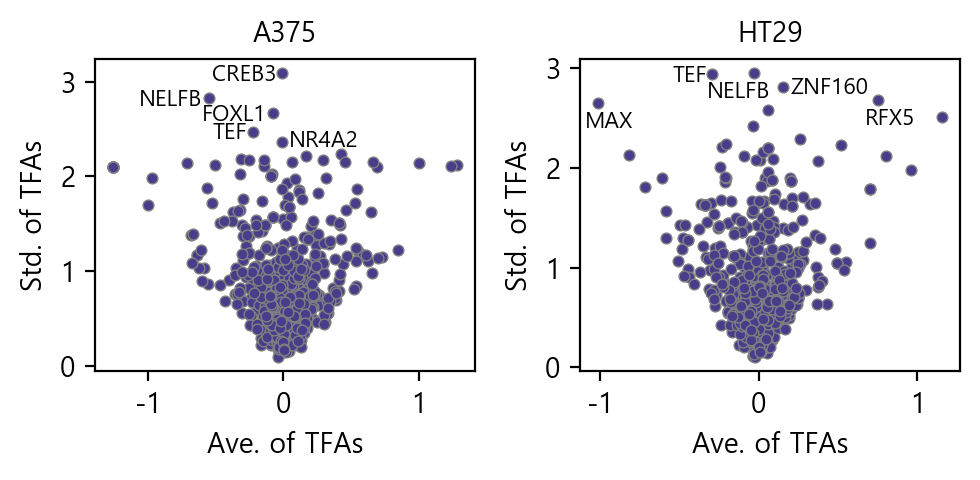

In [2]:
def get_TFa_ave_std(file_name, ax):
    TFa_df=pd.read_table(file_name, sep='\t',engine='python')

    TFa_df.drop(['effect'], axis=1, inplace=True)
    
    cell=file_name[file_name.index('Effect_')+len('Effect_'):file_name.index('_all.txt')]
    
    #### TF activity mean, std per each TF
    ave=TFa_df.apply(np.mean, axis=0)
    std=TFa_df.apply(np.std, axis=0)
    ax.scatter(ave,std,s=15, c='darkslateblue', edgecolors='grey', linewidths=0.5)
    
    ##
    ave_df=pd.concat([ave,std], axis=1)
    ave_df.columns=['ave','std']
    ave_df.sort_values('std', ascending=False, inplace=True)
    
    TF_plot_list=list(ave_df.index[:5])
    for TF in TF_plot_list:
        x=ave_df.loc[TF,'ave']
        y=ave_df.loc[TF,'std']
        
        if cell=='A375':
            if TF in ['CREB3','NELFB','FOXL1']:
                _=ax.annotate(TF, (x-0.52,y-0.08), fontsize=8)
            elif TF in ['TEF']:
                _=ax.annotate(TF, (x-0.3,y-0.08), fontsize=8)
            elif TF in ['NR4A2']:
                _=ax.annotate(TF, (x+0.05,y-0.05), fontsize=8)
            
        if cell=='HT29':
            if TF in ['MAX','RFX5']:
                _=ax.annotate(TF, (x-0.08,y-0.25), fontsize=8)
            elif TF in ['TEF']:
                _=ax.annotate(TF, (x-0.25,y-0.08), fontsize=8)
            elif TF in ['ZNF160']:
                _=ax.annotate(TF, (x+0.05,y-0.07), fontsize=8)
            elif TF in ['NELFB']:
                _=ax.annotate(TF, (x-0.3,y-0.25), fontsize=8)
#         elif (cell=='A375') and (TF=='RELA'):
#             _=ax.annotate(TF, (x-0.83,y-0.2), fontsize=8)
#         else:
#             _=ax.annotate(TF, (x+0.13,y-0.23), fontsize=8)
    
    ax.set_title('{}'.format(cell), fontsize=10)
    ax.set_xlabel('Ave. of TFAs')
    ax.set_ylabel('Std. of TFAs')
    
#### TF activity distribution for A375 and HT29 cell lines

f1='result/TF_activity/effect/TFA_Effect_A375_all.txt'
f2='result/TF_activity/effect/TFA_Effect_HT29_all.txt'

fig, axs = plt.subplots(1,2, figsize=(5,2.5), dpi=200)
axs=axs.flatten()

get_TFa_ave_std(f1, axs[0])
get_TFa_ave_std(f2, axs[1])

fig.tight_layout()
fig.show()
        